Check:
- Check "thirds"
- Check inquisit columns (total pumps, avg pumps, etc.)

Done:
- Hist for numerics, just to make sure nothing is amiss.
- Elapsed time in inquisit.
- Check if someone exploded all balloons; or vice versa.
- Calculated columns are correct (mean, std, range, etc.).

Todo:
- Complete OA to determine what needs to be rectified, and do writeup.

In [1]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt
pd.set_option('display.max_columns', 2000)
%matplotlib inline
#dmt = pd.read_csv('./data/DMT_Data_Merged_10.25.17.csv')
dmt = pd.read_csv('../data/final_data/DMT_Data_Merged_10.25.17.csv')

## Sage

#### NOTES:
- standard deviations not calculated correctly.

In [2]:
def col_convert(row):
    '''
    Convert a column that contains a string of a list of strings, into a list of floats.  
    
    Inputs
        row: a string of a list of strings.
        
    Output
        returns a list of floats
    
    '''
    if pd.notnull(row):
        return [float(x) for x in row.strip('[]').split(',')]
    
    else:
        return row

In [3]:
def check_bart(name):
    pumps = dmt[name + '___pumps_per_balloon'].apply(col_convert).dropna()
    pumps_mean = dmt[name + '___pumps_mean'].dropna()
    pumps_std = dmt[name + '___pumps_standard_deviation'].dropna()
    pumps_range = dmt[name + '___pumps_range'].dropna()
    
    #Confirm means, std, ranges are calculated correctly.
    means = all(np.isclose(pumps.apply(np.mean), pumps_mean, equal_nan=True))
    stds = all(np.isclose(pumps.apply(np.std), pumps_std, equal_nan=True))
    ranges = all(np.isclose(pumps.apply(np.ptp), pumps_range, equal_nan=True))

    print('Means are correct:', means)
    print('Standard deviations are correct:', stds)
    print('Ranges are correct:', ranges)

def describe_bart(name):
    columns = [
        '___max_pumps_per_balloon',
        '___mean_pumps_after_explode',
        '___mean_pumps_after_no_explode',
        '___number_of_explosions',
        '___pumps_mean',
        '___pumps_range',
        '___pumps_standard_deviation',
        '___total_gains'
    ]
    
    for col in columns:
        print(col[3:])
        print(dmt[name + col].describe())
        dmt[name + col].plot.hist(title=col[3:])
        plt.show()
        print()

In [4]:
check_bart('SAGE_bart_v4_baseline_BART0.25')

Means are correct: True
Standard deviations are correct: False
Ranges are correct: True


max_pumps_per_balloon
count    102.000000
mean       9.392157
std        1.611572
min        2.000000
25%       10.000000
50%       10.000000
75%       10.000000
max       12.000000
Name: SAGE_bart_v4_baseline_BART0.25___max_pumps_per_balloon, dtype: float64


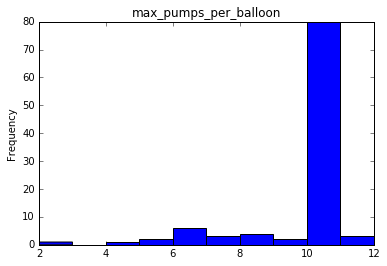


mean_pumps_after_explode
count    102.000000
mean       3.912852
std        1.327006
min        1.500000
25%        3.000000
50%        3.775000
75%        4.600000
max        7.428571
Name: SAGE_bart_v4_baseline_BART0.25___mean_pumps_after_explode, dtype: float64


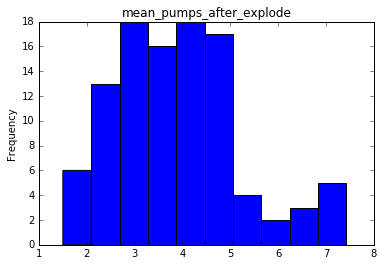


mean_pumps_after_no_explode
count    102.000000
mean       4.421378
std        1.443180
min        1.615385
25%        3.300000
50%        4.225000
75%        5.372159
max        8.600000
Name: SAGE_bart_v4_baseline_BART0.25___mean_pumps_after_no_explode, dtype: float64


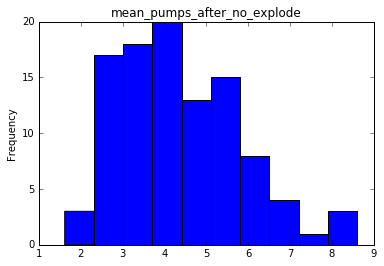


number_of_explosions
count    102.000000
mean       5.617647
std        2.647787
min        1.000000
25%        4.000000
50%        5.000000
75%        7.000000
max       15.000000
Name: SAGE_bart_v4_baseline_BART0.25___number_of_explosions, dtype: float64


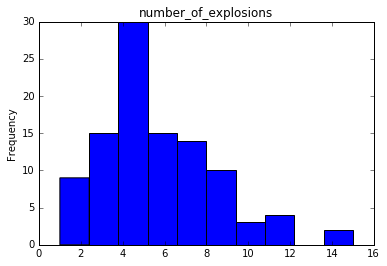


pumps_mean
count    102.000000
mean       4.238562
std        1.265413
min        1.666667
25%        3.216667
50%        4.133333
75%        5.000000
max        7.733333
Name: SAGE_bart_v4_baseline_BART0.25___pumps_mean, dtype: float64


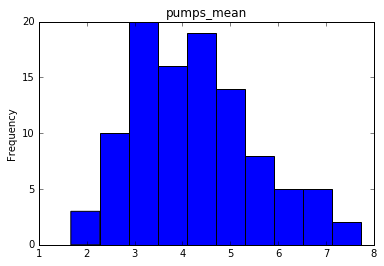


pumps_range
count    102.000000
mean       5.058824
std        2.464896
min        1.000000
25%        3.000000
50%        4.500000
75%        7.000000
max       11.000000
Name: SAGE_bart_v4_baseline_BART0.25___pumps_range, dtype: float64


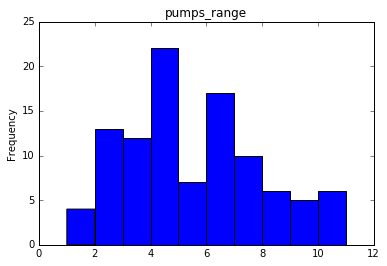


pumps_standard_deviation
count    102.000000
mean       1.462368
std        0.700274
min        0.400000
25%        0.902105
50%        1.347131
75%        1.896892
max        3.473711
Name: SAGE_bart_v4_baseline_BART0.25___pumps_standard_deviation, dtype: float64


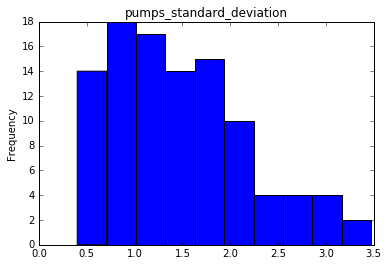


total_gains
count    102.000000
mean       9.727941
std        2.902522
min        0.000000
25%        8.000000
50%        9.750000
75%       11.500000
max       17.000000
Name: SAGE_bart_v4_baseline_BART0.25___total_gains, dtype: float64


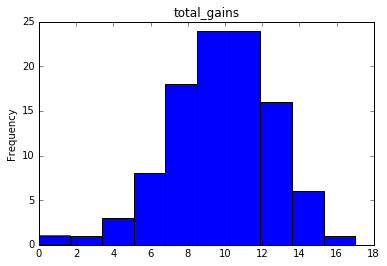

In [5]:
describe_bart('SAGE_bart_v4_baseline_BART0.25')

In [6]:
check_bart('SAGE_bart_v4_baseline_BART250.00')

Means are correct: True
Standard deviations are correct: False
Ranges are correct: True


max_pumps_per_balloon
count    101.000000
mean       9.326733
std        1.766969
min        2.000000
25%       10.000000
50%       10.000000
75%       10.000000
max       12.000000
Name: SAGE_bart_v4_baseline_BART250.00___max_pumps_per_balloon, dtype: float64


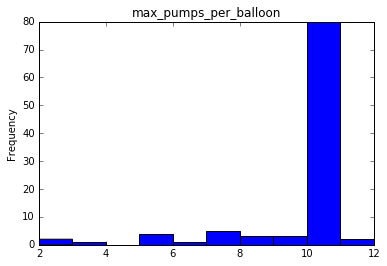


mean_pumps_after_explode
count    101.000000
mean       3.505909
std        1.534367
min        0.000000
25%        2.400000
50%        3.333333
75%        4.333333
max        7.625000
Name: SAGE_bart_v4_baseline_BART250.00___mean_pumps_after_explode, dtype: float64


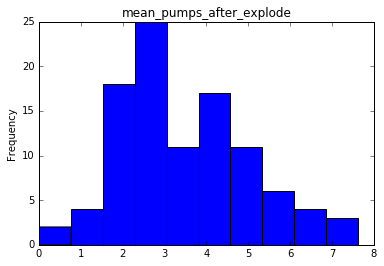


mean_pumps_after_no_explode
count    101.000000
mean       3.962925
std        1.499654
min        1.357143
25%        2.857143
50%        3.636364
75%        5.000000
max        9.000000
Name: SAGE_bart_v4_baseline_BART250.00___mean_pumps_after_no_explode, dtype: float64


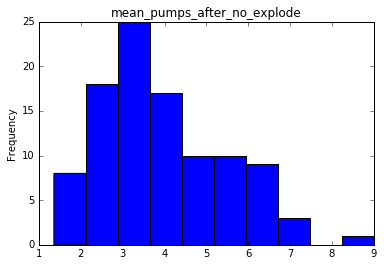


number_of_explosions
count    101.000000
mean       4.900990
std        2.628707
min        0.000000
25%        3.000000
50%        5.000000
75%        7.000000
max       14.000000
Name: SAGE_bart_v4_baseline_BART250.00___number_of_explosions, dtype: float64


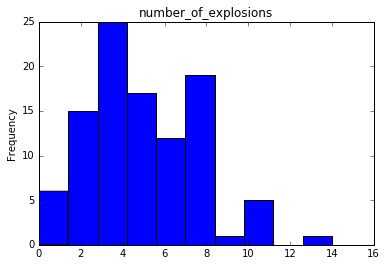


pumps_mean
count    101.000000
mean       3.838944
std        1.380025
min        1.400000
25%        2.800000
50%        3.600000
75%        4.800000
max        8.066667
Name: SAGE_bart_v4_baseline_BART250.00___pumps_mean, dtype: float64


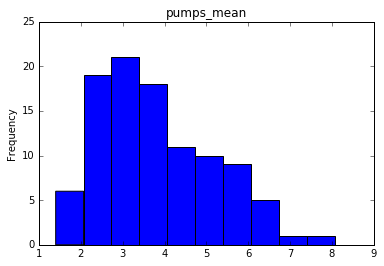


pumps_range
count    101.000000
mean       4.287129
std        2.224125
min        0.000000
25%        3.000000
50%        4.000000
75%        6.000000
max        9.000000
Name: SAGE_bart_v4_baseline_BART250.00___pumps_range, dtype: float64


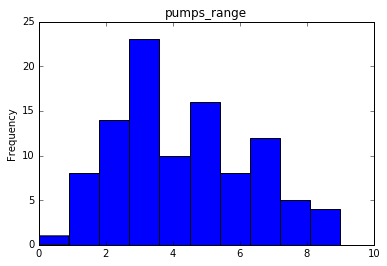


pumps_standard_deviation
count    101.000000
mean       1.284893
std        0.667301
min        0.000000
25%        0.771722
50%        1.123487
75%        1.730767
max        3.067495
Name: SAGE_bart_v4_baseline_BART250.00___pumps_standard_deviation, dtype: float64


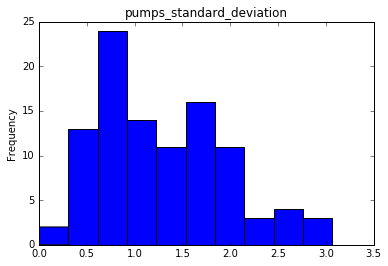


total_gains
count      101.000000
mean      9472.772277
std       2858.736826
min        750.000000
25%       7250.000000
50%       9250.000000
75%      11750.000000
max      16250.000000
Name: SAGE_bart_v4_baseline_BART250.00___total_gains, dtype: float64


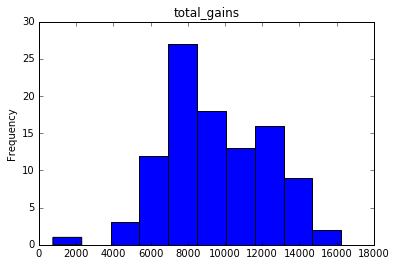

In [7]:
describe_bart('SAGE_bart_v4_baseline_BART250.00')

In [8]:
check_bart('SAGE_bart_v4_21_day_assessment_BART0.25')

Means are correct: True
Standard deviations are correct: False
Ranges are correct: True


max_pumps_per_balloon
count    95.000000
mean      9.326316
std       1.841843
min       2.000000
25%      10.000000
50%      10.000000
75%      10.000000
max      14.000000
Name: SAGE_bart_v4_21_day_assessment_BART0.25___max_pumps_per_balloon, dtype: float64


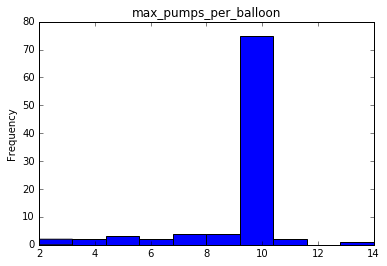


mean_pumps_after_explode
count    95.000000
mean      3.973621
std       1.428847
min       0.000000
25%       3.000000
50%       4.000000
75%       4.666667
max       7.600000
Name: SAGE_bart_v4_21_day_assessment_BART0.25___mean_pumps_after_explode, dtype: float64


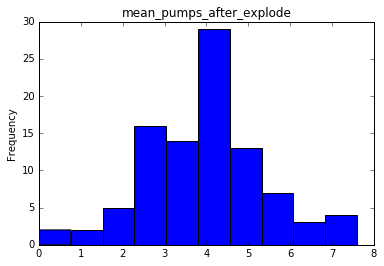


mean_pumps_after_no_explode
count    95.000000
mean      4.253741
std       1.419863
min       1.000000
25%       3.316667
50%       4.181818
75%       5.140909
max       8.714286
Name: SAGE_bart_v4_21_day_assessment_BART0.25___mean_pumps_after_no_explode, dtype: float64


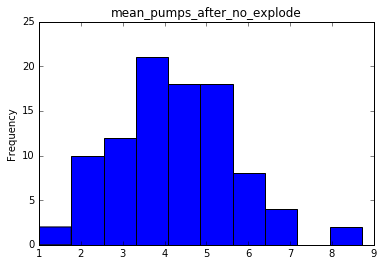


number_of_explosions
count    95.000000
mean      5.326316
std       2.730607
min       0.000000
25%       3.000000
50%       5.000000
75%       7.000000
max      14.000000
Name: SAGE_bart_v4_21_day_assessment_BART0.25___number_of_explosions, dtype: float64


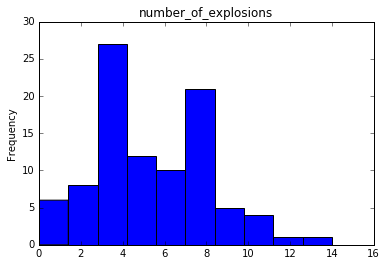


pumps_mean
count    95.000000
mean      4.159298
std       1.267611
min       1.000000
25%       3.366667
50%       4.133333
75%       5.000000
max       7.266667
Name: SAGE_bart_v4_21_day_assessment_BART0.25___pumps_mean, dtype: float64


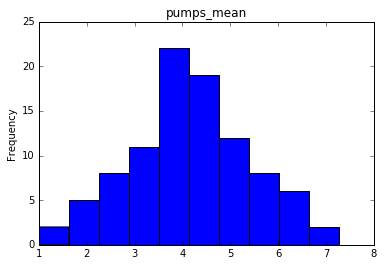


pumps_range
count    95.000000
mean      4.484211
std       2.082670
min       0.000000
25%       3.000000
50%       4.000000
75%       6.000000
max      12.000000
Name: SAGE_bart_v4_21_day_assessment_BART0.25___pumps_range, dtype: float64


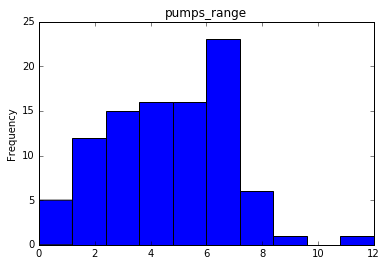


pumps_standard_deviation
count    95.000000
mean      1.340096
std       0.605892
min       0.000000
25%       0.869092
50%       1.290994
75%       1.707405
max       3.534860
Name: SAGE_bart_v4_21_day_assessment_BART0.25___pumps_standard_deviation, dtype: float64


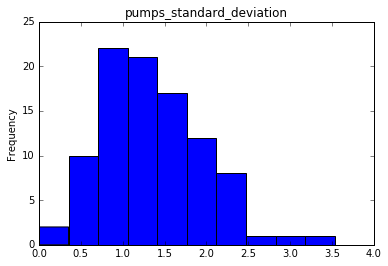


total_gains
count    95.00000
mean     10.10000
std       3.12301
min       0.75000
25%       8.00000
50%      10.00000
75%      11.75000
max      19.50000
Name: SAGE_bart_v4_21_day_assessment_BART0.25___total_gains, dtype: float64


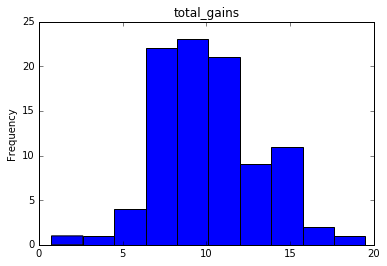

In [9]:
describe_bart('SAGE_bart_v4_21_day_assessment_BART0.25')

In [67]:
check_bart('SAGE_bart_v4_21_day_assessment_BART250.00')

Means are correct: True
Standard deviations are correct: False
Ranges are correct: True


max_pumps_per_balloon
count    94.000000
mean      9.148936
std       1.917421
min       2.000000
25%      10.000000
50%      10.000000
75%      10.000000
max      11.000000
Name: SAGE_bart_v4_21_day_assessment_BART250.00___max_pumps_per_balloon, dtype: float64


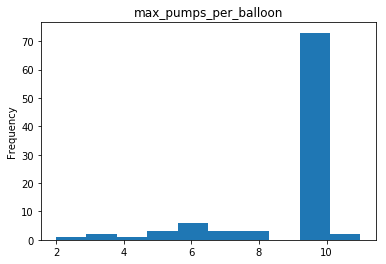


mean_pumps_after_explode
count    94.000000
mean      3.744931
std       1.358809
min       0.000000
25%       3.000000
50%       3.708333
75%       4.500000
max       7.250000
Name: SAGE_bart_v4_21_day_assessment_BART250.00___mean_pumps_after_explode, dtype: float64


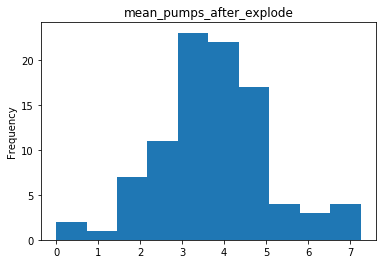


mean_pumps_after_no_explode
count    94.000000
mean      3.952317
std       1.129214
min       1.571429
25%       3.279545
50%       3.923077
75%       4.656250
max       7.166667
Name: SAGE_bart_v4_21_day_assessment_BART250.00___mean_pumps_after_no_explode, dtype: float64


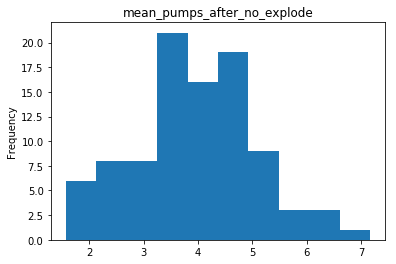


number_of_explosions
count    94.000000
mean      4.691489
std       2.561193
min       0.000000
25%       3.000000
50%       4.500000
75%       6.000000
max      12.000000
Name: SAGE_bart_v4_21_day_assessment_BART250.00___number_of_explosions, dtype: float64


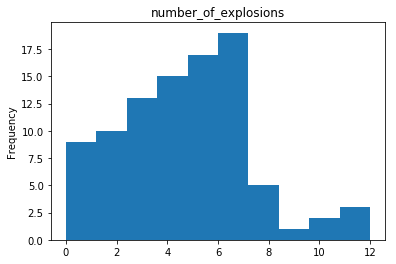


pumps_mean
count    94.000000
mean      3.907801
std       1.079630
min       1.533333
25%       3.083333
50%       3.933333
75%       4.533333
max       7.066667
Name: SAGE_bart_v4_21_day_assessment_BART250.00___pumps_mean, dtype: float64


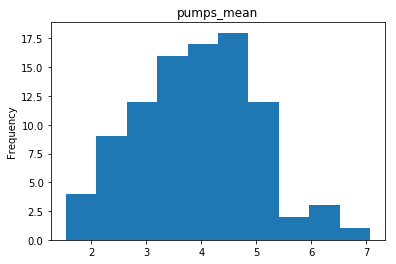


pumps_range
count    94.000000
mean      4.042553
std       1.825241
min       1.000000
25%       3.000000
50%       4.000000
75%       5.000000
max      10.000000
Name: SAGE_bart_v4_21_day_assessment_BART250.00___pumps_range, dtype: float64


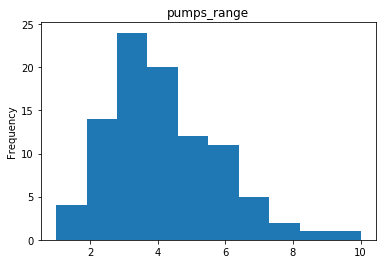


pumps_standard_deviation
count    94.000000
mean      1.218203
std       0.557877
min       0.258199
25%       0.805536
50%       1.160445
75%       1.520939
max       3.514595
Name: SAGE_bart_v4_21_day_assessment_BART250.00___pumps_standard_deviation, dtype: float64


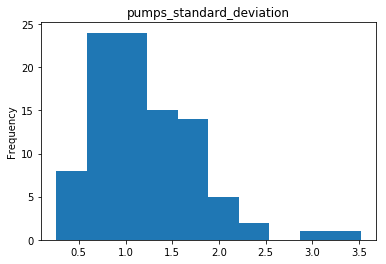


total_gains
count       94.000000
mean     10021.276596
std       2608.314759
min       3000.000000
25%       8500.000000
50%      10000.000000
75%      12000.000000
max      17500.000000
Name: SAGE_bart_v4_21_day_assessment_BART250.00___total_gains, dtype: float64


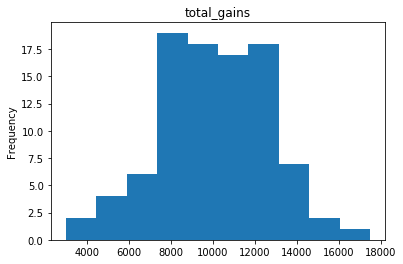

In [68]:
describe_bart('SAGE_bart_v4_21_day_assessment_BART250.00')

## Inquisit

In [69]:
dmt.head()

internalId externalId passive_phone_model  passive_bat_charge_avg  \
0       70052     2w4MVh                 NaN                     NaN   
1       70061     2XdEfU              iPhone                6.835596   
2       70087     2XyVyJ                 NaN                     NaN   
3       70074     34fjYg                 NaN                     NaN   
4       70133     3FGrfL                 NaN                     NaN   

   passive_bat_charge_less_5hr  passive_bat_charge_start_mean  \
0                          NaN                            NaN   
1                     0.708333                      52.611111   
2                          NaN                            NaN   
3                          NaN                            NaN   
4                          NaN                            NaN   

   passive_bat_charge_end_mean  passive_bat_charge_increase_mean  \
0                          NaN                               NaN   
1                    75.104167                         22.493056   
2                          NaN                               NaN   
3                          NaN                               NaN   
4                          NaN                               NaN   

   passive_bat_charge_less_20percent  passive_bat_charge_greater_80percent  \
0                                NaN                                   NaN   
1                           0.159722                                  0.25   
2                                NaN                                   NaN   
3                                NaN                                   NaN   
4                                NaN                                   NaN   

   passive_screen_unlock_num  passive_screen_unlock_less_1min  \
0                        NaN                              NaN   
1                        573                          0.47993   
2                        NaN                              NaN   
3                        NaN                              NaN   
4                        NaN                              NaN   

   passive_screen_unlock_avg_per_day  passive_screen_unlock_avg_time_min  \
0                                NaN                                 NaN   
1                          27.130371                            4.941992   
2                                NaN                                 NaN   
3                                NaN                                 NaN   
4                                NaN                                 NaN   

   passive_screen_unlock_time_ratio  passive_call_out  passive_call_in  \
0                               NaN               NaN              NaN   
1                           0.09311                22               26   
2                               NaN               NaN              NaN   
3                               NaN               NaN              NaN   
4                               NaN               NaN              NaN   

   passive_call_total  passive_call_out_ratio  passive_call_avg_min  \
0                 NaN                     NaN                   NaN   
1                  48                0.458333              2.859375   
2                 NaN                     NaN                   NaN   
3                 NaN                     NaN                   NaN   
4                 NaN                     NaN                   NaN   

   passive_call_out_wait_durations  SAGE_demographics_v2___ROW_ID  \
0                              NaN                             39   
1                         8.636364                             50   
2                              NaN                             77   
3                              NaN                             74   
4                              NaN                            149   

   SAGE_demographics_v2___ROW_VERSION       SAGE_demographics_v2___recordId  \
0                                  16  0843556f-1a8a-49a9-9684-5ddc1c204bc6   
1       

### Elapsed Time:
The mean elapsed time for inquisit BART is about ~7 minutes.  There is a long rightward skew in the histogram, with a maximum of 23.7 minutes.  This indicates some respondents took noticeably longer than others to finish the exercise, but I wouldn't stricken the record.

In [15]:
#Times shown in minutes.
def conv_elapsed(row):
    if pd.notnull(row) and ':' in row:
        return np.nan
    elif pd.notnull(row):
        return float(row)
    else:
        return np.nan

bart_elapsed = dmt['INQUISIT_bart___script.elapsedtime'].apply(conv_elapsed).dropna() / 60000 #Convert to minutes
bart_elapsed.describe() 

count    84.000000
mean      6.983529
std       3.421140
min       2.033583
25%       4.593375
50%       6.853058
75%       7.896475
max      23.719367
Name: INQUISIT_bart___script.elapsedtime, dtype: float64

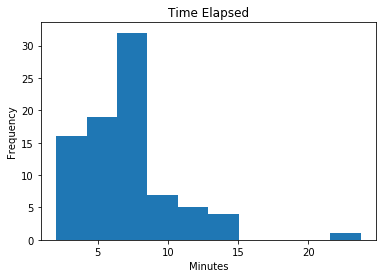

In [16]:
pd.Series(bart_elapsed).plot.hist(title = 'Time Elapsed')
plt.xlabel('Minutes')

In [100]:
#Avg pump count verification.
np.isclose(dmt['INQUISIT_bart___values.averagepumpcount'], dmt['INQUISIT_bart___values.totalpumpcount'] / 30, 
           equal_nan=True).all()

True

In [17]:
#Avg pump count verification.
(dmt['INQUISIT_bart___values.total_explosions'] + dmt['INQUISIT_bart___values.nonexplodedballoons']).dropna().all()

True

## Both Sage & Inquisit

In [18]:
balloons_1 = dmt['SAGE_bart_v4_baseline_BART0.25___number_of_balloons']
explosions_1 = dmt['SAGE_bart_v4_baseline_BART0.25___number_of_explosions']

balloons_2 = dmt['SAGE_bart_v4_baseline_BART250.00___number_of_balloons']
explosions_2 = dmt['SAGE_bart_v4_baseline_BART250.00___number_of_explosions']

balloons_3 = dmt['SAGE_bart_v4_21_day_assessment_BART0.25___number_of_balloons']
explosions_3 = dmt['SAGE_bart_v4_21_day_assessment_BART0.25___number_of_explosions']

balloons_4 = dmt['SAGE_bart_v4_21_day_assessment_BART250.00___number_of_balloons']
explosions_4 = dmt['SAGE_bart_v4_21_day_assessment_BART250.00___number_of_explosions']

balloons_5 = dmt['INQUISIT_bart___values.ballooncount']
explosions_5 = dmt['INQUISIT_bart___values.total_explosions']

balloons = balloons_1 + balloons_2 + balloons_3 + balloons_4 + balloons_5
explosions = explosions_1 + explosions_2 + explosions_3 + explosions_4 + explosions_5

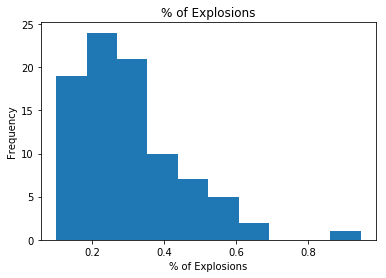

In [19]:
pd.Series(explosions / balloons).plot.hist(title = '% of Explosions')
plt.xlabel('% of Explosions')